In [71]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
from time import sleep
import math

In [1]:
normal_url = "https://azfuncmontecarlo.azurewebsites.net/api/normal?code=Eut99dYhddP0HHfCy7FTuAjfWUeRhaQE_dE8O7s1joWrAzFu4wosAw%3D%3D"
durable_url = "https://azfuncmontecarlo.azurewebsites.net/api/durable?code=vNffNbaLCS18Aqlj2wPH4vc8M8LaBA8WdPikzviF4cnhAzFuGNaWyg%3D%3D"

## サンプリング数の最適値を求める
Iterationを固定してサンプリング数によって結果がどのあたりで頭打ちになるかを調べる。

In [ ]:
sampling_list = [1000,10000,100000,1000000]

status_check_urls = []
for sampling in sampling_list:
    payload = {
        "SamplingPerIteration": sampling,
        "TotalIterations": 200
    }
    durable_response = requests.post(durable_url, json=payload)
    status_check = durable_response.json()
    status_check_urls.append([sampling, status_check['statusQueryGetUri']])

In [62]:
result_by_sampling = []
while True:
    completed_count = 0
    for status_check_url in status_check_urls:
        status_response = requests.get(status_check_url[1]).json()
        if status_response['runtimeStatus'] == 'Completed':
            result_by_sampling.append([status_response['input']['SamplingPerIteration'],status_response['output']])
            completed_count += 1
            print(f"Completed: {status_response['input']['SamplingPerIteration']}")
    if completed_count == len(sampling_list):  
        break
    sleep(5)

Completed: 1000
Completed: 10000
Completed: 100000
Completed: 1000000


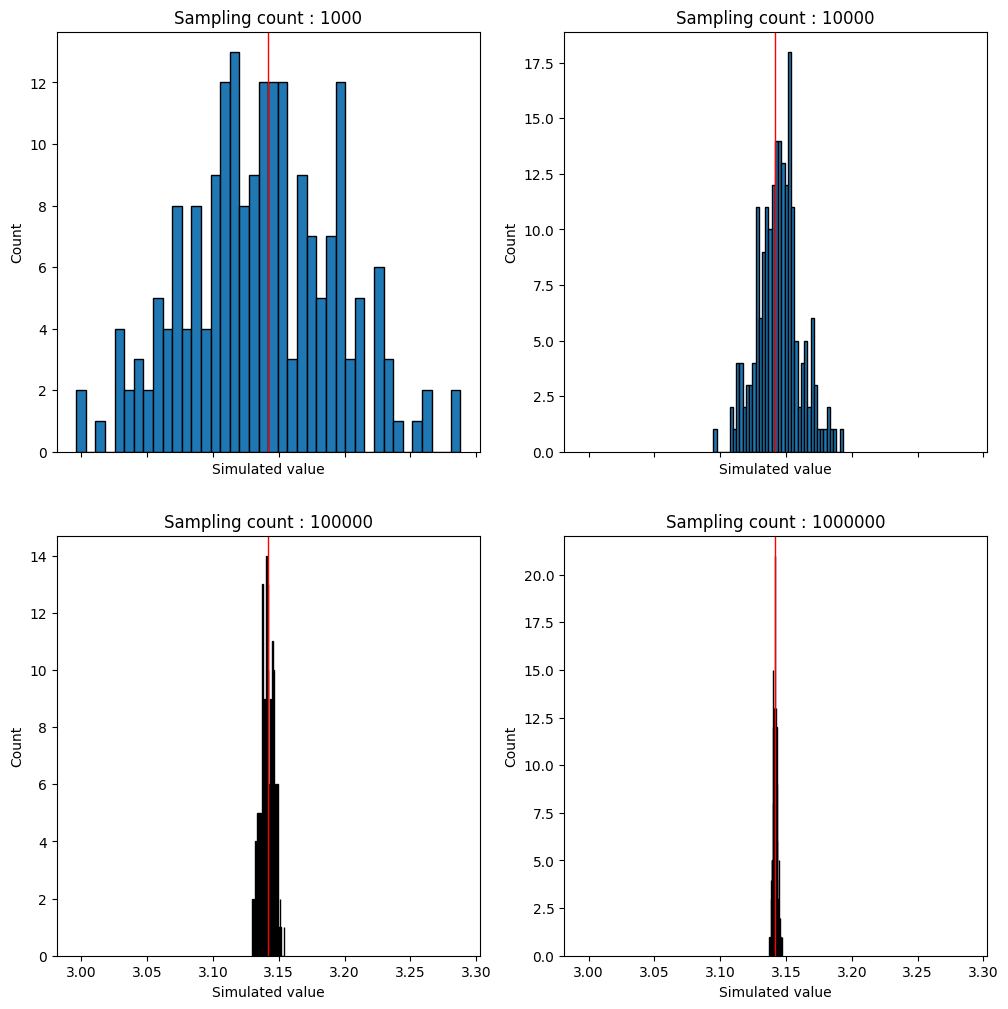

<Figure size 300x300 with 0 Axes>

In [74]:
fig, axes = plt.subplots(len(sampling_list)//2, 2, figsize=(12, len(sampling_list)*3),sharex="all")
plt.figure(figsize=(3, 3))

# Sort result_by_sampling based on the first element (sampling count) in ascending order
result_by_sampling.sort(key=lambda x: x[0])

for i in range(len(sampling_list)):
    j = 1 if i >= len(sampling_list) // 2 else 0
    k = i - len(sampling_list) // 2 if i >= len(sampling_list) // 2 else i
    axes[j][k].hist(result_by_sampling[i][1]['Iterations'], bins=40, edgecolor='black')
    axes[j][k].set_title('Sampling count : '+str(result_by_sampling[i][0]))
    axes[j][k].set_xlabel('Simulated value')
    axes[j][k].set_ylabel('Count')
    axes[j][k].axvline(math.pi, color='RED', lw=1)

plt.tight_layout()
plt.show()

## イテレーション数の最適値を求める
前項からサンプリング数を100000に固定してイテレーション数によって結果がどのあたりで頭打ちになるかを調べる。

In [78]:
iteration_list = [10, 100,1000,10000]

status_check_urls = []
for iteration in iteration_list:
    payload = {
        "SamplingPerIteration": 100000,
        "TotalIterations": iteration
    }
    durable_response = requests.post(durable_url, json=payload)
    status_check = durable_response.json()
    status_check_urls.append([iteration, status_check['statusQueryGetUri']])

In [82]:
result_by_iteration = []
while True:
    completed_count = 0
    for status_check_url in status_check_urls:
        status_response = requests.get(status_check_url[1]).json()
        if status_response['runtimeStatus'] == 'Completed':
            result_by_iteration.append([status_response['input']['TotalIterations'],status_response['output']])
            completed_count += 1
            print(f"Completed: {status_response['input']['TotalIterations']}")
    if completed_count == len(iteration_list):  
        break
    sleep(5)

Completed: 10
Completed: 100
Completed: 1000
Completed: 10000


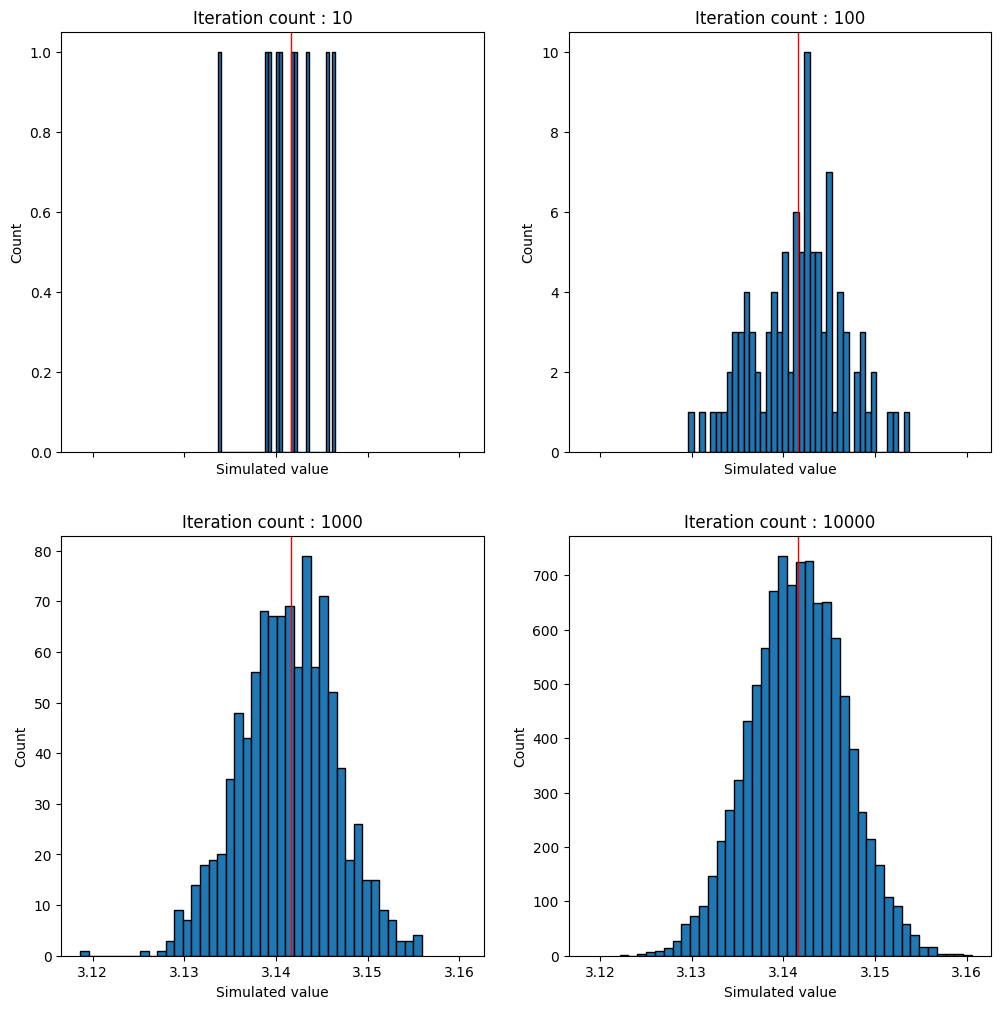

<Figure size 300x300 with 0 Axes>

In [83]:
fig, axes = plt.subplots(len(iteration_list)//2, 2, figsize=(12, len(iteration_list)*3),sharex="all")
plt.figure(figsize=(3, 3))

# Sort result_by_sampling based on the first element (sampling count) in ascending order
result_by_iteration.sort(key=lambda x: x[0])

for i in range(len(iteration_list)):
    j = 1 if i >= len(iteration_list) // 2 else 0
    k = i - len(iteration_list) // 2 if i >= len(iteration_list) // 2 else i
    axes[j][k].hist(result_by_iteration[i][1]['Iterations'], bins=40, edgecolor='black')
    axes[j][k].set_title('Iteration count : '+str(result_by_iteration[i][0]))
    axes[j][k].set_xlabel('Simulated value')
    axes[j][k].set_ylabel('Count')
    axes[j][k].axvline(math.pi, color='RED', lw=1)

plt.tight_layout()
plt.show()

## 最終結果
ここまでの結果からサンプリング数10000、イテレーション数10000で最終結果を求める。

In [88]:
payload = {
    "SamplingPerIteration": 100000,
    "TotalIterations": 10000
}
durable_response = requests.post(durable_url, json=payload)
status_check = durable_response.json()
status_check_url = status_check['statusQueryGetUri']

In [90]:
while True:
    status_response = requests.get(status_check_url).json()
    if status_response['runtimeStatus'] == 'Completed':
        result = status_response['output']
        print(f"SimulatedAverageValue: {result['SimulatedAverageValue']}")
        print(f"SimulatedMedianValue: {result['SimulatedMedianValue']}")
        print(f"SimulatedModeValue: {result['SimulatedModeValue']}")
        print(f"DurationSecond: {result['DurationSecond']}")
        break   
    sleep(20)

SimulatedAverageValue: 3.141632191999967
SimulatedMedianValue: 3.14168
SimulatedModeValue: 3.14168
DurationSecond: 195.2828693


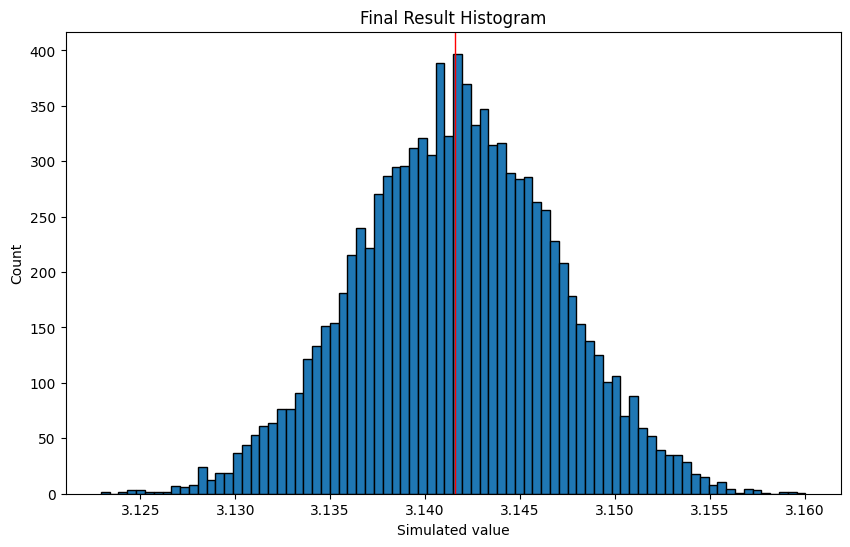

In [96]:
plt.figure(figsize=(10, 6))
plt.hist(result['Iterations'], bins=80, edgecolor='black')
plt.title('Final Result Histogram')
plt.xlabel('Simulated value')
plt.ylabel('Count')
plt.axvline(math.pi, color='RED', lw=1)
plt.show()